
## Author Prediction : Data Analysis

> Assignment from **Uniqreate**

---

### Neccessary imports

In [1]:
import sys
import re
import os
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sys.path.append("../")
# other local imports
from utlis.nlp_utlis import *
from utlis.text_analysis import FeatureEng

warnings.filterwarnings('ignore')
sns.set_context('paper')
nltk.download('stopwords')
features = FeatureEng

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shivani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---

# Assignment Overview

**Problem Statement** -Given the content, your task is to predict the author.

---
**About Dataset**
File 1 - content_author_assignment_train.csv
File 2 - content_author_assignment_test.csv

The train file for any analysis and training
The test file can solely be used for prediction.

Columns - content, author

**Evaluation criteria** -cross entropy loss


## Exploratory Data Analysis
---

> Reading data from csv files given

In [2]:
df_train = pd.read_csv("../data/content_author_assignment_train.csv")
print("Shape of train data=>",df_train.shape)
df_train.head()

Shape of train data=> (712, 2)


,content,author
0,"Fourth time this season, heavy rains paralysed...",The Quint
1,The BJP has made a significant gain of 11 addi...,PTI
2,Rajya Sabha saw two disruptions on Thursday al...,FP Staff
3,"Senior IPS officer Subodh Jaiswal, who had bee...",The Quint
4,"The government, on 27 February, announced a si...",PTI


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  712 non-null    object
 1   author   712 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [4]:
list_of_authors = list(df_train.author.unique())
list_of_authors

['The Quint', 'PTI', 'FP Staff', 'Press Trust of India', 'Scroll Staff']

In [5]:
df_train.isna().sum()

content    0
author     0
dtype: int64

> We do not have any NA values in the data.

In [6]:
df_train.isnull().sum()

content    0
author     0
dtype: int64

> Neither we have any Null values in the data.

### Checking the distribution frequency of author's content

<AxesSubplot:xlabel='author', ylabel='count'>

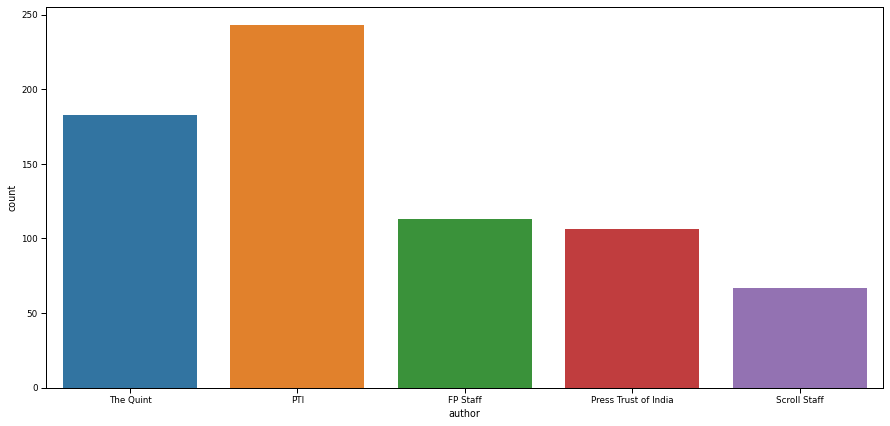

In [7]:
plt.figure(figsize=(15,7)) 
sns.countplot(df_train.author)

>Observation: Dominant classes are "The Quint" and "PTI"

In [8]:
#Getting Avg word count by category
df_train['word_count'] = df_train['content'].apply(word_count)
avg_wc = df_train.groupby('author').mean().reset_index()
avg_wc[['author','word_count']]

,author,word_count
0,FP Staff,560.893805
1,PTI,365.333333
2,Press Trust of India,413.735849
3,Scroll Staff,391.358209
4,The Quint,487.950820


<AxesSubplot:xlabel='author', ylabel='word_count'>

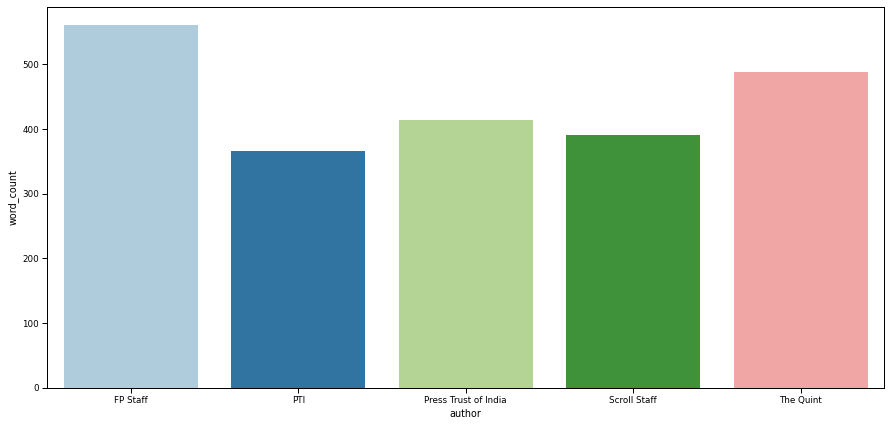

In [9]:
plt.figure(figsize=(15,7)) 
sns.barplot(x='author', y='word_count', data=avg_wc,palette="Paired")

>Observation: "FP Staff" have more text richness wrt word_count of the content compared to other authors

## Cleaning and Text Preprocessing

In [10]:
df_train['clean_content'] = df_train.content.apply(lambda x: features.clean_text(x))

In [11]:
print("-------------Before Cleaning-----------------")
y = df_train.content[0]
temp_dict = {}
special_chars = re.sub('[\w]+' ,'',y)
numbers = sum(char.isdigit() for char in y)
letters = sum(char.isalpha() for char in y)
others  = len(y) - numbers - letters
temp_dict['Total Characters'] = len(y)
temp_dict['Special Characters'] = len(special_chars)
temp_dict['Numbers'] = numbers
temp_dict['Letters'] = letters
temp_dict['Others'] = others
print(temp_dict)       
print("-------------After Cleaning-----------------")
y = df_train.clean_content[0]
temp_dict = {}
special_chars = re.sub('[\w]+' ,'',y)
numbers = sum(char.isdigit() for char in y)
letters = sum(char.isalpha() for char in y)
others  = len(y) - numbers - letters
temp_dict['Total Characters'] = len(y)
temp_dict['Special Characters'] = len(special_chars)
temp_dict['Numbers'] = numbers
temp_dict['Letters'] = letters
temp_dict['Others'] = others
print(temp_dict)        

-------------Before Cleaning-----------------
{'Total Characters': 4916, 'Special Characters': 971, 'Numbers': 46, 'Letters': 3899, 'Others': 971}
-------------After Cleaning-----------------
{'Total Characters': 4698, 'Special Characters': 799, 'Numbers': 0, 'Letters': 3899, 'Others': 799}


**Quick look at the data again**

In [12]:
df_train.head()

,content,author,word_count,clean_content
0,"Fourth time this season, heavy rains paralysed...",The Quint,818,fourth time this season heavy rains paralysed ...
1,The BJP has made a significant gain of 11 addi...,PTI,274,the bjp has made a significant gain of additio...
2,Rajya Sabha saw two disruptions on Thursday al...,FP Staff,846,rajya sabha saw two disruptions on thursday al...
3,"Senior IPS officer Subodh Jaiswal, who had bee...",The Quint,890,senior ips officer subodh jaiswal who had been...
4,"The government, on 27 February, announced a si...",PTI,207,the government on february announced a signifi...


### Visualization of most frequent words in content

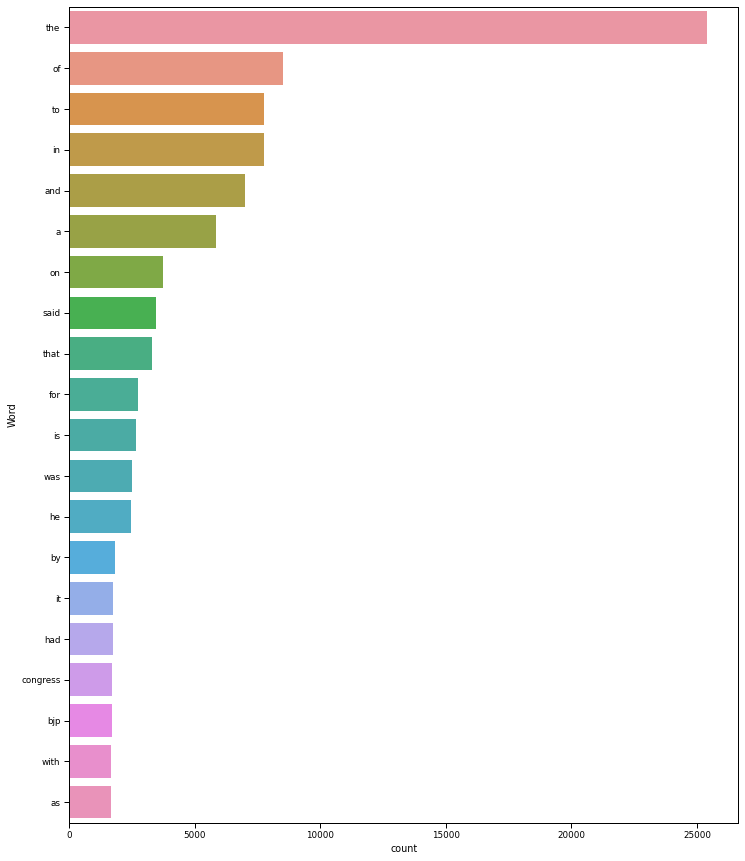

In [13]:
# print 20 most frequent words 
features.freq_words(df_train.clean_content, 20)

> As expected, the word ``` the ``` is the most frequent word in the content. Supports the hypothesis of English language.

### Removing stopwords and performing stemming

> Since stop words don't really add any meaning to a sentence. For this task we will be removing them.

In [14]:
df_train['clean_content'] = df_train['clean_content'].apply(lambda x: features.remove_stopwords(x))

In [15]:
df_train.head()

,content,author,word_count,clean_content
0,"Fourth time this season, heavy rains paralysed...",The Quint,818,fourth time season heavy rains paralysed city ...
1,The BJP has made a significant gain of 11 addi...,PTI,274,bjp made significant gain additional seats con...
2,Rajya Sabha saw two disruptions on Thursday al...,FP Staff,846,rajya sabha saw two disruptions thursday alrea...
3,"Senior IPS officer Subodh Jaiswal, who had bee...",The Quint,890,senior ips officer subodh jaiswal working coun...
4,"The government, on 27 February, announced a si...",PTI,207,government february announced significant redu...


In [16]:
df_train['clean_content'] = df_train['clean_content'].apply(lambda x: features.stem_corpus(x))

### Visualizing frequency of words after common words(stop words) are removed.

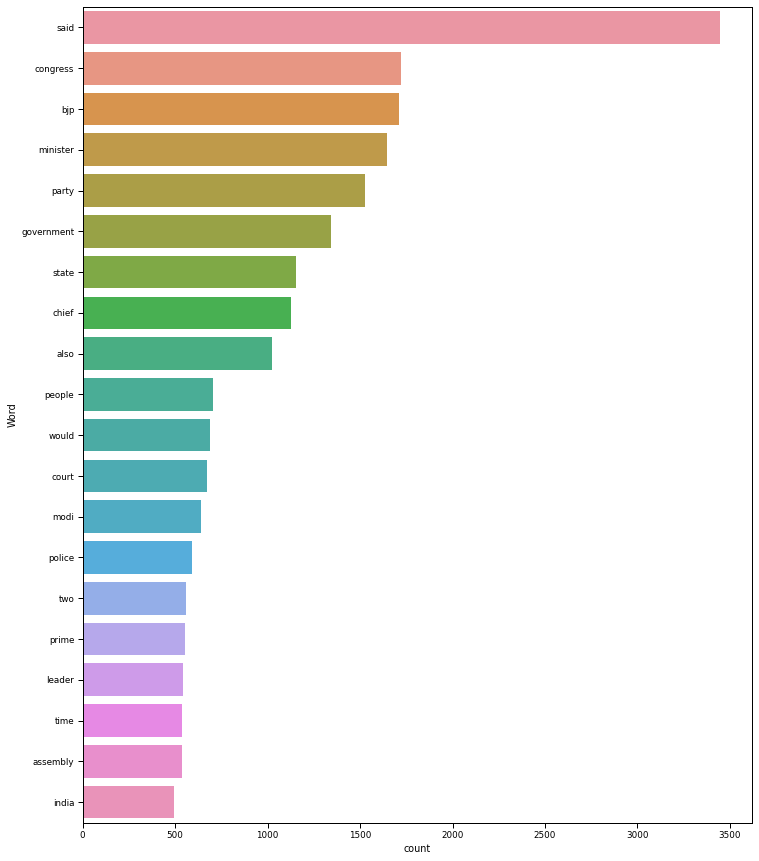

In [17]:
features.freq_words(df_train['clean_content'], 20)

> As we can see, now the most frequent words are not the most common words of English language. Hence now we can get more knowledge out of the text content.

### Observing coorelated terms

> using unigrams and bigrams

In [18]:
#Applying the function to preprocess the text.  (cleaned_content as list of tokens)
'''Tokenize, lower, expand contactions, lemmatize, remove punctuation, numbers and stop words'''
df_train['clean_content'] = df_train['content'].apply(process_text)
df_train.head()

,content,author,word_count,clean_content
0,"Fourth time this season, heavy rains paralysed...",The Quint,818,"[fourth, time, season, , heavy, rain, paralyse..."
1,The BJP has made a significant gain of 11 addi...,PTI,274,"[bjp, make, significant, gain, 11, additional,..."
2,Rajya Sabha saw two disruptions on Thursday al...,FP Staff,846,"[rajya, sabha, saw, two, disruption, thursday,..."
3,"Senior IPS officer Subodh Jaiswal, who had bee...",The Quint,890,"[senior, ip, officer, subodh, jaiswal, , work,..."
4,"The government, on 27 February, announced a si...",PTI,207,"[government, , 27, february, , announce, signi..."


In [19]:
#Preparing the dataframes
#Splitting the df into the different categories
df_fps = df_train.loc[df_train['author'] == 'FP Staff'] 
df_pti = df_train.loc[df_train['author'] =='PTI']
df_pressti = df_train.loc[df_train['author'] == 'Press Trust of India'] 
df_ss = df_train.loc[df_train['author']== 'Scroll Staff']
df_tq = df_train.loc[df_train['author'] =='The Quint']

In [20]:
#Getting top 15 words by category, taking bigrams into account.

top_n = 15

text_fps = df_fps['clean_content'].tolist()
text_pti = df_pti['clean_content'].tolist()
text_pressti = df_pressti['clean_content'].tolist()
text_ss = df_ss['clean_content'].tolist()
text_tq =  df_tq['clean_content'].tolist()

fps = word_freq_bigrams(text_fps, top_n=top_n)
pti = word_freq_bigrams(text_pti, top_n=top_n)
pressti = word_freq_bigrams(text_pressti, top_n=top_n)
ss = word_freq_bigrams(text_ss, top_n=top_n)
tq = word_freq_bigrams(text_tq, top_n=top_n)

df_wf = pd.concat([fps,pti,pressti,ss,tq], axis=1)
cols = ['FP Staff','fps_count', 'PTI','pti_count', 'Press trust of India','press_count', 'Scroll Staff','ss_count', 'The Quint', 'tq_count']
df_wf.columns = cols
df_wf

,FP Staff,fps_count,PTI,pti_count,Press trust of India,press_count,Scroll Staff,ss_count,The Quint,tq_count
0,say,314,say,580,say,311,say,160,say,396
1,bjp,248,state,251,congress,181,party,86,source_,306
2,congress,229,bjp,232,bjp,166,report,81,tell,247
3,state,187,government,220,party,148,congress,60,firsttime_woman,180
4,government,151,congress,212,government,122,state,55,voter_want,180
5,also,146,say_,183,people,115,prime_minister,54,quints_campaign,180
6,chief_minister,142,party,160,say_,111,also,47,also,173
7,minister,135,also,159,state,111,people,46,police,133
8,party,127,people,155,leader,93,police,46,report,130
9,say_,121,would,130,also,85,bjp,45,say_,127


> Most correlated unigrams for all authors are: STATE, PARTY, BJP, GOVERNMENT

In [21]:
#Top 15 bigrams by category

fps_bigrams = bigram_freq(text_fps, top_n = top_n)
pti_bigrams = bigram_freq(text_pti, top_n = top_n)
pressti_bigrams = bigram_freq(text_pressti, top_n = top_n)
ss_bigrams = bigram_freq(text_ss, top_n = top_n)
tq_bigrams = bigram_freq(text_tq, top_n = top_n)
df_bigram_wf = pd.concat([fps_bigrams, pti_bigrams, pressti_bigrams, ss_bigrams,tq_bigrams], axis=1)
df_bigram_wf.columns = cols
df_bigram_wf

,FP Staff,fps_count,PTI,pti_count,Press trust of India,press_count,Scroll Staff,ss_count,The Quint,tq_count
0,chief_minister,142,say_,183,say_,111,prime_minister,54,source_,306
1,say_,121,chief_minister,127,prime_minister,77,say_,41,firsttime_woman,180
2,prime_minister,103,prime_minister,101,chief_minister,76,chief_minister,41,voter_want,180
3,party_,74,lok_sabha,78,party_,58,india_,33,quints_campaign,180
4,however_,71,however_,65,lok_sabha,53,party_,31,say_,127
5,lok_sabha,69,uttar_pradesh,64,state_,42,bharatiya_janata,30,prime_minister,79
6,jd_,69,party_,63,narendra_modi,36,state_,24,chief_minister,74
7,narendra_modi,68,narendra_modi,59,opposition_party,30,supreme_court,23,however_,67
8,uttar_pradesh,47,supreme_court,57,election_,28,however_,22,party_,58
9,rahul_gandhi,38,jd_,50,rahul_gandhi,27,government_,22,india_,57


> Top 2 correlated bigrams for all authors are: Prime_minster & Cheif_minster

---

### Feature Extraction

---
>  Text-features are useful because they are related to the way the author is writing. So they are a useful to extract some generalized facts about each one of the authors.

In [22]:
# full text content from the authors as an array
tq = df_train[df_train.author == "The Quint"]["content"].values
pti = df_train[df_train.author == "PTI"]["content"].values
press = df_train[df_train.author == "Press Trust of India"]["content"].values
fps = df_train[df_train.author == "FP Staff"]["content"].values
ss = df_train[df_train.author == "Scroll Staff"]["content"].values

# full text content from the authors as a string
tq_s = " ".join(tq)
pti_s = " ".join(pti)
press_s = " ".join(press)
fps_s = " ".join(fps)
ss_s = " ".join(ss)

# full plain text (with no capital and punctuation) 
tq_s_c = features.cleaning(tq_s)
pti_s_c = features.cleaning(pti_s)
press_s_c = features.cleaning(press_s)
fps_s_c = features.cleaning(fps_s)
ss_s_c = features.cleaning(ss_s)

In [23]:
df_textfeature = pd.DataFrame([["The Quint", tq_s], ["PTI", pti_s], ["Press Trust of India", press_s],["FP Staff",fps_s],["Scroll Staff",ss_s]])
df_textfeature.columns = ['author', 'content']

for f in [features.count_emph, features.count_dial, features.count_dial_break, features.break_to_dial_ratio, features.count_fem, features.count_mas, features.fem_to_mas_ratio]:
    df_textfeature['norm_' + f.__name__] = df_textfeature.content.apply(f)
    
for f in [features.count_emph, features.count_dial, features.count_dial_break, features.count_fem, features.count_mas]: # normalization of count_emph, count_dial, and count_dial_break
    df_textfeature['norm_' + f.__name__] = df_textfeature['norm_' + f.__name__] / df_textfeature.author.apply(lambda x: len(df_train[df_train.author == x]))
    
df_textfeature.head()

,author,content,norm_count_emph,norm_count_dial,norm_count_dial_break,norm_break_to_dial_ratio,norm_count_fem,norm_count_mas,norm_fem_to_mas_ratio
0,The Quint,"Fourth time this season, heavy rains paralysed...",0.267760,0.830601,0.109290,0.131579,3.404372,6.071038,0.560756
1,PTI,The BJP has made a significant gain of 11 addi...,0.658436,3.098765,0.242798,0.078353,1.255144,4.831276,0.259796
2,Press Trust of India,Goa chief minister Manohar Parrikar will meet...,1.047170,4.801887,0.537736,0.111984,1.169811,7.122642,0.164238
3,FP Staff,Rajya Sabha saw two disruptions on Thursday al...,0.991150,4.212389,0.584071,0.138655,1.106195,7.345133,0.150602
4,Scroll Staff,The Bharatiya Janata Party received Rs 167.8 c...,0.000000,0.044776,0.000000,0.000000,1.149254,4.462687,0.257525


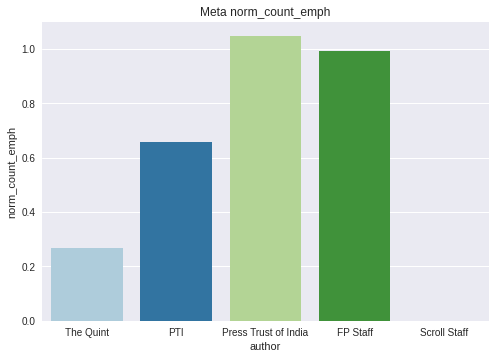

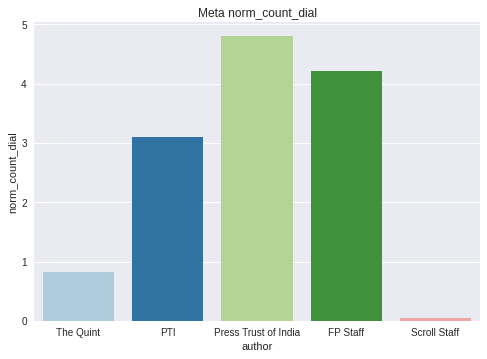

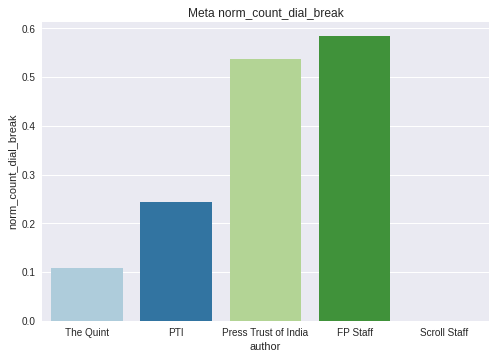

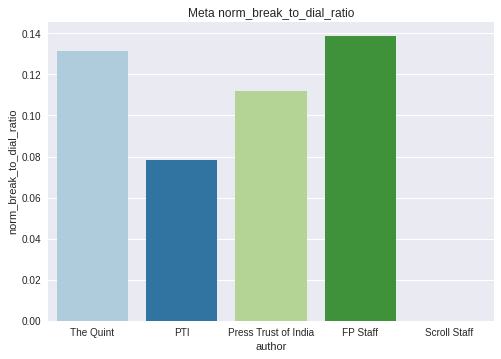

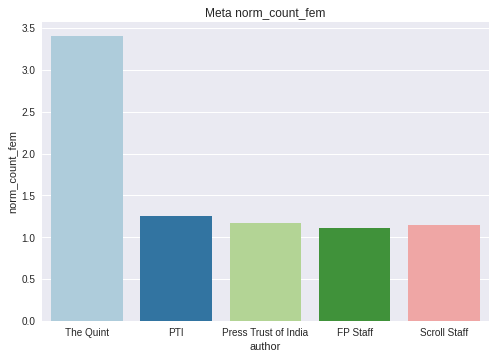

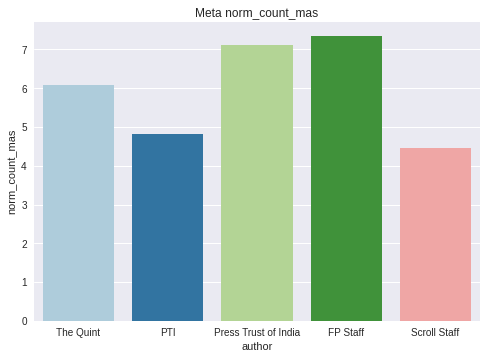

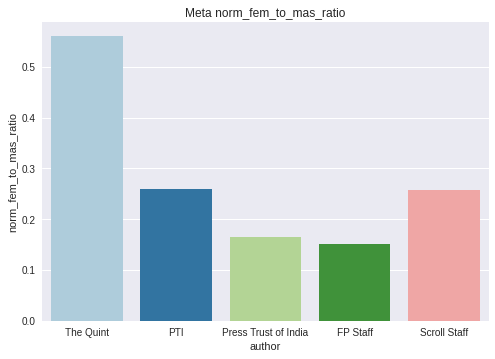

In [24]:
for c in df_textfeature.columns[2:]:
    plt.style.use('seaborn')
    sns.barplot(x='author', y=c, data=df_textfeature,  palette="Paired")
    plt.title('Meta {}'.format(c))
    plt.show()

> **Observation :-***
1. Author- **'Press Trust of India'** and **'FP Staff'** writting style is very similar on basis of meta features extracted. Like both the authors prefer use of emphases as well as dialogue content more than other authors.
2. Author- **'The Quit'** uses words termed under the category of feminine as well as masculine words.
3. The nature of Scroll Staff could not be exactly analysed for few features.

### The count of masculine/feminine words: to observe some word preferences per author.

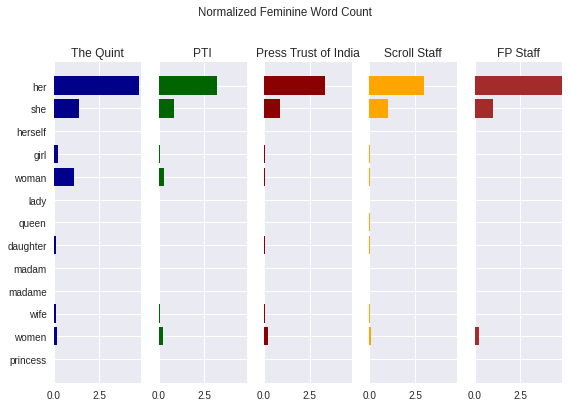

In [25]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1, 5, sharey=True)
fem_words = 'her she herself girl woman lady queen daughter madam madame wife women princess'.split()

plt.suptitle('Normalized Feminine Word Count', y=1.02)

xlmt = 0
for auth in [(tq_s_c, 'The Quint'), (pti_s_c, 'PTI'), (press_s_c, 'Press Trust of India'), (ss_s_c, 'Scroll Staff'),(fps_s_c,'FP Staff')]:
    for word in fem_words:
        norm_count = auth[0].count(word) / len(df_train[df_train.author == auth[1]])
        if norm_count > xlmt:
            xlmt = norm_count

for ax in ((ax1, tq_s_c, 'darkblue', 'The Quint'), (ax2, pti_s_c, 'darkgreen', 'PTI'), (ax3, press_s_c, 'darkred', 'Press Trust of India'),(ax4,ss_s_c,'orange','Scroll Staff'),(ax5, fps_s_c,'brown','FP Staff')):
    y = np.arange(len(fem_words))
    x = [ax[1].count(word) / len(df_train[df_train.author == ax[3]]) for word in fem_words]
    ax[0].barh(y, x, align='center',
            color=ax[2], ecolor='black')
    ax[0].set_yticks(y)
    ax[0].set_yticklabels(fem_words)
    ax[0].invert_yaxis()
    ax[0].set_title(ax[3])
    ax[0].set_xlim([0, xlmt])
    
plt.tight_layout()
# plt.savefig('data/Meta feminine word count')
plt.show()

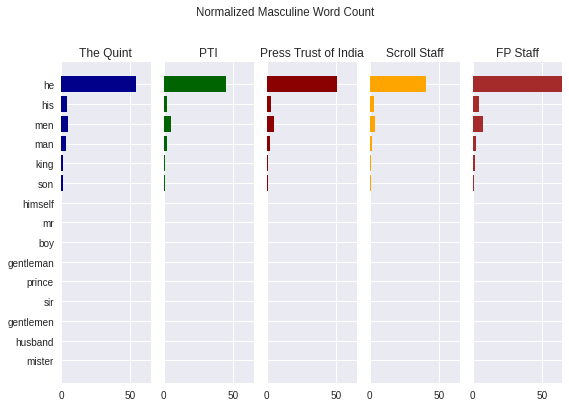

In [26]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1, 5, sharey=True)
mas_words = 'he his men man king son himself mr boy gentleman prince sir gentlemen husband mister'.split()

plt.suptitle('Normalized Masculine Word Count', y=1.02)

xlmt = 0
for auth in [(tq_s_c, 'The Quint'), (pti_s_c, 'PTI'), (press_s_c, 'Press Trust of India'), (ss_s_c, 'Scroll Staff'),(fps_s_c,'FP Staff')]:
    for word in mas_words:
        norm_count = auth[0].count(word) / len(df_train[df_train.author == auth[1]])
        if norm_count > xlmt:
            xlmt = norm_count
            
for ax in ((ax1, tq_s_c, 'darkblue', 'The Quint'), (ax2, pti_s_c, 'darkgreen', 'PTI'), (ax3, press_s_c, 'darkred', 'Press Trust of India'),(ax4,ss_s_c,'orange','Scroll Staff'),(ax5, fps_s_c,'brown','FP Staff')):
    y = np.arange(len(mas_words))
    x = [ax[1].count(word) / len(df_train[df_train.author == ax[3]]) for word in mas_words]
    ax[0].barh(y, x, align='center',
            color=ax[2], ecolor='black')
    ax[0].set_yticks(y)
    ax[0].set_yticklabels(mas_words)
    ax[0].invert_yaxis()
    ax[0].set_title(ax[3])
    ax[0].set_xlim([0, xlmt])
    
plt.tight_layout()
# plt.savefig('data/Meta masculine word count')
plt.show()

>**Observation:**
The words, 'her, she & he' is a way lot more used by all the authors.

In [27]:
def build_meta(dataframe):
    """Building a dataframe that shows the author and the other meta-data related to the sentence."""
    df_meta = dataframe.copy()
    list_meta = [features.length_character,
             features.length_sentence,
             features.length_word,  
             features.vocabulary_sentence,
             features.density_stopword,
             features.density_noun,
             features.density_verb,
             features.density_adjective,
             features.adjective_to_noun,
             features.density_coma,
             features.density_point,
             features.density_colon,
             features.density_semicolon,
             features.density_interro,
             features.density_expl
            ]
    for f in list_meta:
        df_meta[f.__name__] = df_meta.content.apply(f)
    return df_meta

In [ ]:
df_metadata= build_meta(df_train)
df_metadata.head()

In [ ]:
for c in df_metadata.columns[4:]:
    plt.style.use('seaborn')
    sns.barplot(x='author', y=c, data=df_metadata,palette="Paired")
    plt.title('Meta {}'.format(c))
#     plt.savefig('data/Meta {}'.format(c))
    plt.show()

> observation: Special characters like colon, semi-colon and exclamation are used less.

### Observing emotions in content 

> Based on NRC data: 8 emotions (NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt is used for the purpose)

Emotion analysis attributes emotional score for emotion features.

>'positive' ,'anger', 'disgust','fear','negative','sadness','anticipation','joy','surprise' &'trust'

In [ ]:
df_datatext = features.emotions(df_train)
df_datatext.head()

In [ ]:
for c in df_datatext.columns[4:]:
    plt.style.use('seaborn')
    sns.barplot(x='author', y=c, data=df_datatext,palette="Paired")
    plt.title('Emotions {}'.format(c))
    plt.show()

> Future Scope: For analysis purpose we can also go for evaluating sentiment of the content or apply topic modelling to get entities out of author's content